In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

In [2]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

In [3]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

In [4]:
def compute_cost(x, y, w, b): 
    m = x.shape[0]
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [5]:
def compute_gradient(x, y, w, b):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [6]:
def gradient_descent(X, y, cost_function, compute_gradient, iterations=10000, alpha=1e-2):
    J_history = []
    p_history = []
    b = 0
    w = 0
    
    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        J_history.append(cost_function(X, y, w, b))

        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1][0]:.3f}: w = {w[0]:.3f}, b = {b[0]:.3f}")

    print(f"\n(w,b) found by gradient descent: ({w[0]:.3f}, {b[0]:.3f})")

    return w, b

## 

In [7]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

X, X_mu, X_sigma = zscore_normalize_features(X)

In [8]:
w_final, b_final = gradient_descent(X, y, compute_cost, compute_gradient)

Iteration 0: Cost 13916.990: w = 1.096, b = 1.245
Iteration 1000: Cost 438.900: w = 109.555, b = 124.495
Iteration 2000: Cost 438.900: w = 109.559, b = 124.500
Iteration 3000: Cost 438.900: w = 109.559, b = 124.500
Iteration 4000: Cost 438.900: w = 109.559, b = 124.500
Iteration 5000: Cost 438.900: w = 109.559, b = 124.500
Iteration 6000: Cost 438.900: w = 109.559, b = 124.500
Iteration 7000: Cost 438.900: w = 109.559, b = 124.500
Iteration 8000: Cost 438.900: w = 109.559, b = 124.500
Iteration 9000: Cost 438.900: w = 109.559, b = 124.500

(w,b) found by gradient descent: (109.559, 124.500)


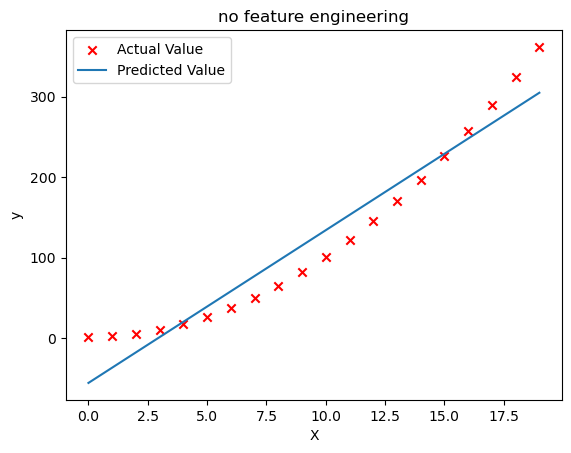

In [9]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x,X*w_final + b_final, label="Predicted Value")
plt.title("no feature engineering")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 

In [10]:
x = np.arange(0, 20, 1)
y = 1 + x**2

X = x**2
X = X.reshape(-1, 1)

X, X_mu, X_sigma = zscore_normalize_features(X)

In [11]:
w_final, b_final = gradient_descent(X, y, compute_cost, compute_gradient)

Iteration 0: Cost 13908.256: w = 1.135, b = 1.245
Iteration 1000: Cost 0.000: w = 113.490, b = 124.495
Iteration 2000: Cost 0.000: w = 113.495, b = 124.500
Iteration 3000: Cost 0.000: w = 113.495, b = 124.500
Iteration 4000: Cost 0.000: w = 113.495, b = 124.500
Iteration 5000: Cost 0.000: w = 113.495, b = 124.500
Iteration 6000: Cost 0.000: w = 113.495, b = 124.500
Iteration 7000: Cost 0.000: w = 113.495, b = 124.500
Iteration 8000: Cost 0.000: w = 113.495, b = 124.500
Iteration 9000: Cost 0.000: w = 113.495, b = 124.500

(w,b) found by gradient descent: (113.495, 124.500)


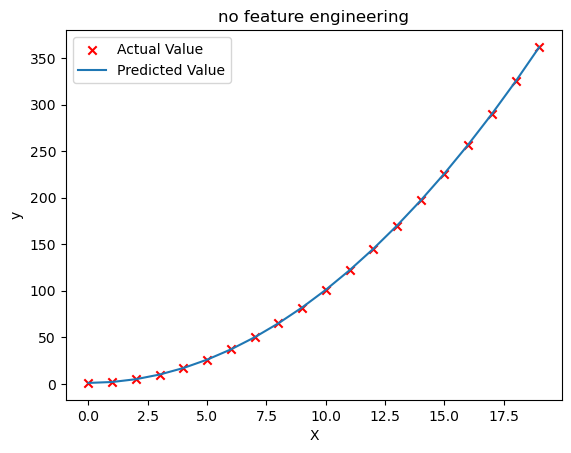

In [12]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x,X*w_final + b_final, label="Predicted Value")
plt.title("no feature engineering")
plt.xlabel("X"); plt.ylabel("y")
plt.legend()
plt.show()

## 

In [13]:
x = np.arange(0, 20, 1)
y = x**2

X = np.c_[x, x**2, x**3]

X, X_mu, X_sigma = zscore_normalize_features(X)

In [14]:
w_final, b_final = gradient_descent(X, y, compute_cost, compute_gradient)

Iteration 0: Cost 13795.458: w = 1.096, b = 1.235
Iteration 1000: Cost 438.900: w = 109.555, b = 123.495
Iteration 2000: Cost 438.900: w = 109.559, b = 123.500
Iteration 3000: Cost 438.900: w = 109.559, b = 123.500
Iteration 4000: Cost 438.900: w = 109.559, b = 123.500
Iteration 5000: Cost 438.900: w = 109.559, b = 123.500
Iteration 6000: Cost 438.900: w = 109.559, b = 123.500
Iteration 7000: Cost 438.900: w = 109.559, b = 123.500
Iteration 8000: Cost 438.900: w = 109.559, b = 123.500
Iteration 9000: Cost 438.900: w = 109.559, b = 123.500

(w,b) found by gradient descent: (109.559, 123.500)


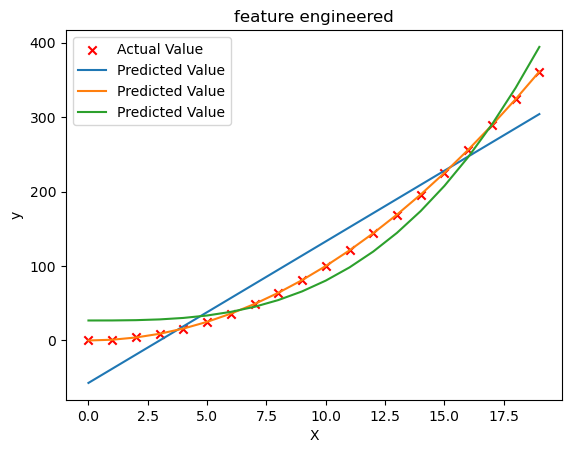

In [15]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x, X*w_final + b_final, label="Predicted Value")
plt.title("feature engineered")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## 

In [23]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X, X_mu, X_sigma  = zscore_normalize_features(X)

In [24]:
w_final, b_final = gradient_descent(X, y, compute_cost, compute_gradient)

Iteration 0: Cost 0.264: w = -0.002, b = -0.000
Iteration 1000: Cost 0.250: w = -0.165, b = -0.007
Iteration 2000: Cost 0.250: w = -0.165, b = -0.007
Iteration 3000: Cost 0.250: w = -0.165, b = -0.007
Iteration 4000: Cost 0.250: w = -0.165, b = -0.007
Iteration 5000: Cost 0.250: w = -0.165, b = -0.007
Iteration 6000: Cost 0.250: w = -0.165, b = -0.007
Iteration 7000: Cost 0.250: w = -0.165, b = -0.007
Iteration 8000: Cost 0.250: w = -0.165, b = -0.007
Iteration 9000: Cost 0.250: w = -0.165, b = -0.007

(w,b) found by gradient descent: (-0.165, -0.007)


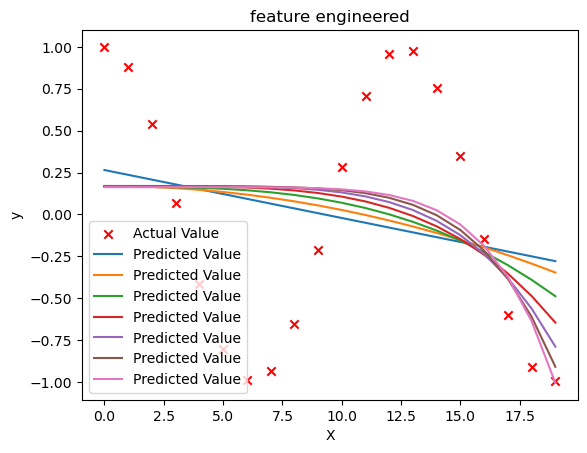

In [22]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value")
plt.plot(x, X*w_final + b_final, label="Predicted Value")
plt.title("feature engineered")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()